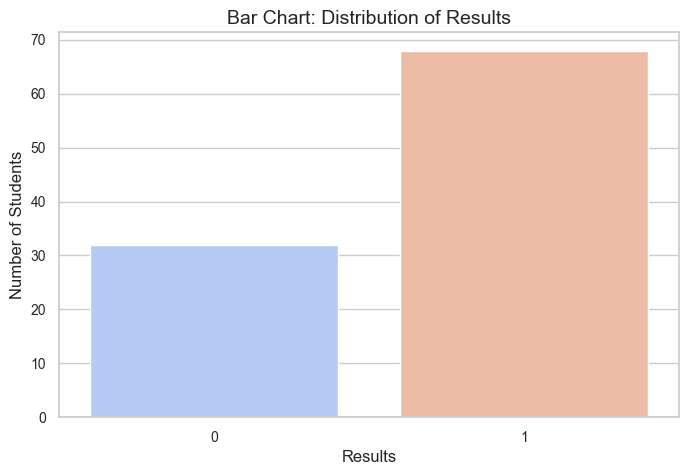

Logistic Regression Coefficients: [1.40365599 1.42846816]
Intercept: -4.581361227356291
Accuracy: 0.85
AUC: 0.9642857142857144


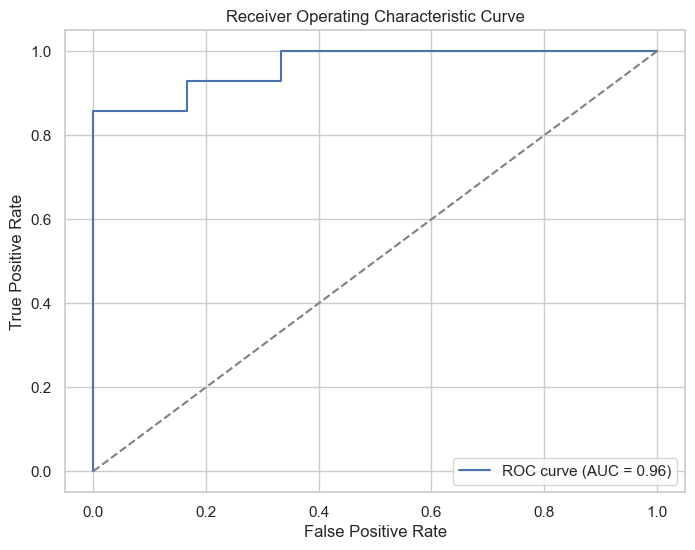

Thomas (2 hours, no review session): Log odds = [-1.77404924], Odds = [0.16964466], Likelihood = [0.14503949]
Thomas (2 hours, with review session): Log odds = [-0.34558109], Odds = [0.70780893], Likelihood = [0.4144544]
8 hours (no review session): Log odds = [6.64788671], Odds = [771.15293256], Likelihood = [0.99870492]
8 hours (with review session): Log odds = [8.07635487], Odds = [3217.48367336], Likelihood = [0.99968929]


In [18]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Load the dataset
file_path = r"E:\734\student_data.csv"  # Use raw string
student_data = pd.read_csv(file_path)

# Data visualization
sns.set(style="whitegrid")

# Convert results to DataFrame for Seaborn compatibility
results_df = student_data["Results"].value_counts().reset_index()
results_df.columns = ["Results", "Count"]

# Create a bar chart with explicit hue assignment
plt.figure(figsize=(8, 5))
sns.barplot(data=results_df, x="Results", y="Count", hue="Results", palette="coolwarm", legend=False)

# Add titles and labels
plt.title("Bar Chart: Distribution of Results", fontsize=14)
plt.xlabel("Results", fontsize=12)
plt.ylabel("Number of Students", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Display the bar chart
plt.show()



# Prepare the feature matrix (X) and target vector (y)
X = student_data[["Hours_Studied", "Review_Session"]]
y = student_data["Results"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the logistic regression model
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

# Get the model coefficients
coefficients = logreg_model.coef_[0]
intercept = logreg_model.intercept_[0]

# Predict the probabilities and classes
y_prediction = logreg_model.predict(X_test)
y_probablity = logreg_model.predict_proba(X_test)[:, 1]

# Calculate accuracy, AUC, and ROC
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Print logistic regression coefficients and performance metrics
print(f"Logistic Regression Coefficients: {coefficients}")
print(f"Intercept: {intercept}")
print(f"Accuracy: {accuracy}")
print(f"AUC: {auc}")

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc='lower right')
plt.show()

# Logistic Regression - Calculating log odds, odds, and likelihood for Thomas's case
def calculate_log_odds(model, data):
    return np.dot(data, model.coef_.T) + model.intercept_

def calculate_odds(log_odds):
    return np.exp(log_odds)

def calculate_likelihood(log_odds):
    return 1 / (1 + np.exp(-log_odds))

# Thomas studied for 2 hours and did not attend the review session
thomas_data_no_review = np.array([2, 0])
log_odds_no_review = calculate_log_odds(logreg_model, thomas_data_no_review)
odds_no_review = calculate_odds(log_odds_no_review)
likelihood_no_review = calculate_likelihood(log_odds_no_review)

# Thomas studied for 2 hours and attended the review session
thomas_data_with_review = np.array([2, 1])
log_odds_with_review = calculate_log_odds(logreg_model, thomas_data_with_review)
odds_with_review = calculate_odds(log_odds_with_review)
likelihood_with_review = calculate_likelihood(log_odds_with_review)

# Print Thomas's results
print(f"Thomas (2 hours, no review session): Log odds = {log_odds_no_review}, Odds = {odds_no_review}, Likelihood = {likelihood_no_review}")
print(f"Thomas (2 hours, with review session): Log odds = {log_odds_with_review}, Odds = {odds_with_review}, Likelihood = {likelihood_with_review}")

# Now for a student who studied 8 hours and didn't attend the review session
student_data_8_hours_no_review = np.array([8, 0])
log_odds_8_hours_no_review = calculate_log_odds(logreg_model, student_data_8_hours_no_review)
odds_8_hours_no_review = calculate_odds(log_odds_8_hours_no_review)
likelihood_8_hours_no_review = calculate_likelihood(log_odds_8_hours_no_review)

# Student who studied 8 hours and attended the review session
student_data_8_hours_with_review = np.array([8, 1])
log_odds_8_hours_with_review = calculate_log_odds(logreg_model, student_data_8_hours_with_review)
odds_8_hours_with_review = calculate_odds(log_odds_8_hours_with_review)
likelihood_8_hours_with_review = calculate_likelihood(log_odds_8_hours_with_review)

# Print the results for 8 hours studied
print(f"8 hours (no review session): Log odds = {log_odds_8_hours_no_review}, Odds = {odds_8_hours_no_review}, Likelihood = {likelihood_8_hours_no_review}")
print(f"8 hours (with review session): Log odds = {log_odds_8_hours_with_review}, Odds = {odds_8_hours_with_review}, Likelihood = {likelihood_8_hours_with_review}")



In [15]:
# SVM with Linear Kernel
svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train, y_train)

# SVM with RBF Kernel and GridSearchCV to find best gamma
param_grid = {'gamma': ['scale', 'auto', 0.1, 1, 10]}
svm_rbf = SVC(kernel='rbf', random_state=42)
grid_search = GridSearchCV(svm_rbf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best gamma from grid search
best_gamma = grid_search.best_params_['gamma']
svm_rbf_best = grid_search.best_estimator_

# Evaluate both models on test set
y_pred_linear = svm_linear.predict(X_test)
y_pred_rbf = svm_rbf_best.predict(X_test)

# Performance metrics for both models
report_linear = classification_report(y_test, y_pred_linear)
report_rbf = classification_report(y_test, y_pred_rbf)

# Print SVM performance metrics
print(f"SVM Linear Kernel Classification Report:\n{report_linear}")
print(f"SVM RBF Kernel Classification Report:\n{report_rbf}")
print(f"Best Gamma for RBF Kernel: {best_gamma}")

SVM Linear Kernel Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.83      0.77         6
           1       0.92      0.86      0.89        14

    accuracy                           0.85        20
   macro avg       0.82      0.85      0.83        20
weighted avg       0.86      0.85      0.85        20

SVM RBF Kernel Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.83      0.77         6
           1       0.92      0.86      0.89        14

    accuracy                           0.85        20
   macro avg       0.82      0.85      0.83        20
weighted avg       0.86      0.85      0.85        20

Best Gamma for RBF Kernel: 1
